# Earthquake Data Analysis

### Description

The catalog includes the magnitude, time of occurrence (s), and 3D coordinates (m) of earthquakes in about 20 years of recording in South California. Coordinates were converted from latitude, longitude, and depth of events in a seismic catalog. Magnitudes should be within the range $[0,8]$.

* **Waiting time (t)**: time interval between an event and the next one in the sequence.
* **Distance (r)**: Eucledian 3D distance between events. (each 3D set of coordinates refers to the hypocenter, i.e. the point triggering the slip in a fault that forms the earthquake)


### Assignments

1. Deduce what is the variable in each column of the catalog.
2. Visualize the process in space and/or time with suitable time series and/or 3D visualizations of the hypocenters. For instance, plot a space variable (a single coordinate or a nice linear combination of coordinates) as a function of time.
3. Compute the distribution $P_m(t)$ of waiting times for events of magnitude m or above (i.e. do not consider events below $m$). In shaping the bin sizes, take into account that this distribution is expected to have a power-law decay with time (e.g $\sim 1/t$), and that a power-law is well visualized in log-log scale. Do this analysis for many values of $m$, say $m=2,3,4,5$.
4. Compute the distribution $P_m(r)$ of the distance between an event and the next one, considering earthquakes of magnitude m or above. Also here make a clever choice for the bin sizes and try several values of $m$.
5. Compute the distribution $P_{m,R}(t)$ of waiting times for events of magnitude $m$ or above, which are separated by at most a distance $r<R$, for different values of m and $R$. (In this statistics, if the following event is farther than $R$, skip the $t$ and go to the next pair)
6. Eventually note if, from the analysis of the previous points, there emerges a scaling picture. Is there a suitable rescaling that collapses distributions for various $m$ (and eventually $R$ if point 5 is considered) on a single curve?

### Datasets

* column 1: index of the event
* column 2: index of the previous event that triggered it (defined with a given algorithm), -1 if no ancestor is found
* column 3: time (seconds) from 0:00 of Jan.1st, 1982
* column 4: magnitude
* columns 5, 6, and 7: 3D coordinates (meters) of the earthquake hypocenter, i.e. of the point from where it started. These Euclidean coordinates are derived from latitude, longitude and depth.

Joining each event to that with the index of the second column (if not -1), there emerges a set of causal trees.


### Contact
* Marco Baiesi <marco.baiesi@unipd.it>

In [201]:
import pandas as pd

data = 'SouthCalifornia-1982-2011_Physics-of-Data.dat'


In [202]:
#from google.colab import drive
#drive.mount('/content/drive')
#filepath = '/content/drive/MyDrive/LCP_project/'

In [203]:
#df = pd.read_csv(filepath + data, sep = ' ', names = ['Index', 'Prev event', 'Time', 'Magnitude', 'x', 'y', 'z'])
df = pd.read_csv(data, sep = ' ', names = ['Index', 'Prev_event', 'Time', 'Magnitude', 'x', 'y', 'z'])

df.head(5)

,Index,Prev_event,Time,Magnitude,x,y,z
0,0,-1,0.00000,2.71,-2571956,-4627162,3520602
1,1,0,36501.39072,2.12,-2363740,-4787011,3461373
2,2,0,37488.27744,2.33,-2363746,-4786942,3461232
3,3,0,47982.51648,2.57,-2475085,-4664024,3548479
4,4,0,60268.57056,2.98,-2238642,-4839098,3469546


In [204]:
df.tail(5)
df

,Index,Prev_event,Time,Magnitude,x,y,z
0,0,-1,0.000000e+00,2.71,-2571956,-4627162,3520602
1,1,0,3.650139e+04,2.12,-2363740,-4787011,3461373
2,2,0,3.748828e+04,2.33,-2363746,-4786942,3461232
3,3,0,4.798252e+04,2.57,-2475085,-4664024,3548479
4,4,0,6.026857e+04,2.98,-2238642,-4839098,3469546
...,...,...,...,...,...,...,...
110266,110266,-1,9.304996e+08,2.60,-2668492,-4335735,3810743
110267,110267,-1,9.305115e+08,2.02,-2297480,-4823870,3445285
110268,110268,-1,9.305318e+08,2.00,-2404797,-4441247,3868121
110269,110269,-1,9.305363e+08,2.17,-2388375,-4691191,3550903


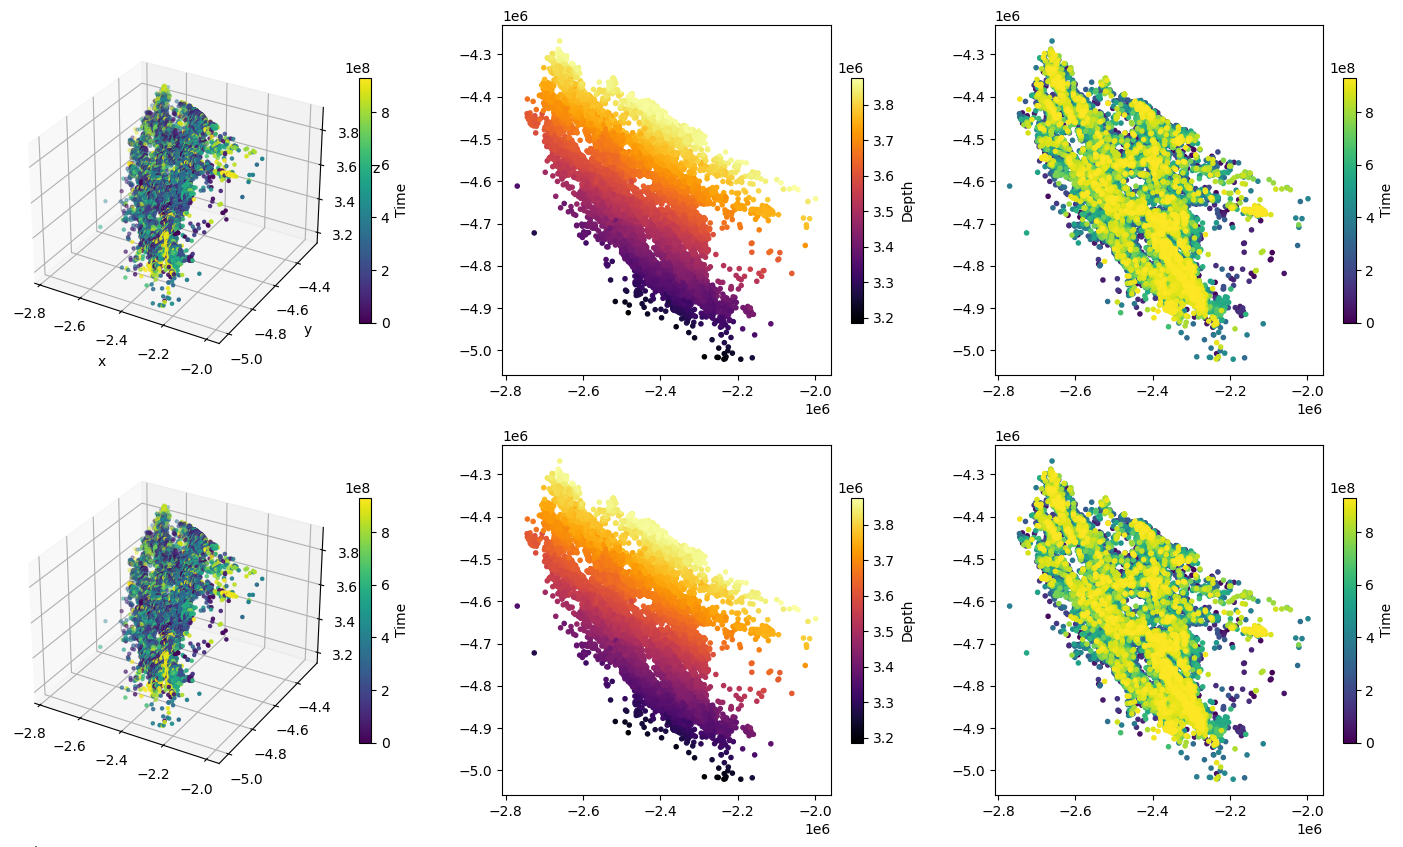

In [205]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(18,10))

ax1 = fig.add_subplot(2, 3, 1, projection='3d')
scatter1 = ax1.scatter(df['x'], df['y'], df['z'], c=df['Time'], cmap='viridis', marker='.')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
fig.colorbar(scatter1, label='Time', shrink=0.7)

ax2 = fig.add_subplot(2, 3, 2)
scatter2 = ax2.scatter(df['x'], df['y'], c=df['z'], cmap='inferno', marker='.')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
fig.colorbar(scatter2, label='Depth', shrink=0.7)

ax3 = fig.add_subplot(2, 3, 3)
scatter3 = ax3.scatter(df['x'], df['y'], c=df['Time'], cmap='viridis', marker='.')
fig.colorbar(scatter3, label='Time', shrink=0.7)

ax4 = fig.add_subplot(2, 3, 4, projection='3d')
scatter4 = ax4.scatter(df['x'], df['y'], df['z'], c=df['Time'], cmap='viridis', marker='.')
fig.colorbar(scatter4, label='Time', shrink=0.7)

ax5 = fig.add_subplot(2, 3, 5)
scatter5 = ax5.scatter(df['x'], df['y'], c=df['z'], cmap='inferno', marker='.')
fig.colorbar(scatter5, label='Depth', shrink=0.7)

ax6 = fig.add_subplot(2, 3, 6)
scatter6 = ax6.scatter(df['x'], df['y'], c=df['Time'], cmap='viridis', marker='.')
fig.colorbar(scatter6, label='Time', shrink=0.7)

# andamento chiaro della dipendenza della depth da longitude e latitude, inefficacia del primo plot perchè non c'è una
# dipendenza temporale definita dalla posizione dell'ipocentro

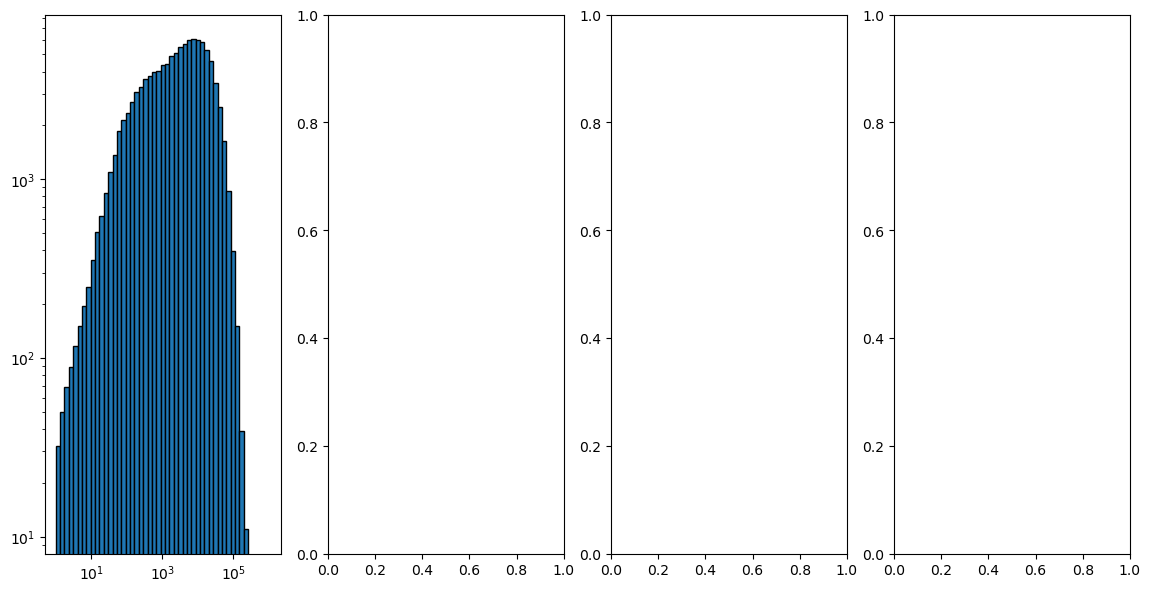

In [206]:
import numpy as np

m = [2, 3, 4, 5]

fig, ax = plt.subplots(1, 4, figsize = (14,7))
#print(df)
for j, i in enumerate(m):
      df2 = df[df['Magnitude']>= i]
      #wt = df2['Waiting_time']
      #wt = [0]
      #print(df2['Index'])
      #for j in range(1, len(df2)):
            #print(j)            
            #wt.append(df2['Time'][j] -  df2['Time'][j-1])
      wt = np.diff(df2['Time'])
      
      x = np.logspace(0, np.log10(np.max(wt)), 50)
      #x = np.linspace(0, df2['Time'].max(), 50)
      #df2['Waiting_= wt
      
      ax[j].hist(wt, bins = x, edgecolor='black')
      ax[j].set_xscale('log', base = 10)
      ax[j].set_yscale('log', base = 10)
      
      plt.show()

            
      